## Naive Bayes Classification

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('../../Datasets/loan_data.csv')
df.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int.rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log.annual.inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days.with.cr.line  100 non-null    float64
 8   revol.bal          100 non-null    int64  
 9   revol.util         100 non-null    float64
 10  inq.last.6mths     100 non-null    int64  
 11  delinq.2yrs        100 non-null    int64  
 12  pub.rec            100 non-null    int64  
 13  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [11]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,1.0,0.101028,227.940000,11.079282,9.035000,726.600000,4562.093750,17009.490000,35.50000,0.770000,0.130000,0.060000,0.100000
std,0.0,0.023150,162.367679,0.715795,5.981154,44.854873,2630.856598,22933.459903,26.17237,1.033333,0.393251,0.238683,0.301511
min,1.0,0.071400,32.550000,8.987197,0.000000,627.000000,1110.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.080700,124.745000,10.596635,3.662500,682.000000,2684.968750,3141.750000,14.30000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.096400,160.615000,11.156251,8.310000,722.000000,4253.979166,6678.500000,31.55000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.115400,301.910000,11.512925,14.395000,763.250000,5840.000000,22254.500000,53.65000,1.000000,0.000000,0.000000,0.000000
max,1.0,0.159600,829.100000,12.429216,22.090000,812.000000,14008.958330,128000.000000,93.40000,4.000000,2.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [14]:
df.corr(numeric_only=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,NaN,1.000000,0.265648,-0.212034,0.367552,-0.849058,-0.274595,0.029348,0.722467,0.176097,0.088470,0.263298,0.274115
installment,NaN,0.265648,1.000000,0.086312,0.048827,0.004488,0.188119,0.133486,0.233903,-0.014618,-0.023884,0.072492,0.082602
log.annual.inc,NaN,-0.212034,0.086312,1.000000,-0.185605,0.269451,0.289267,0.405284,-0.241006,-0.074460,0.122079,-0.099371,-0.056429
dti,NaN,0.367552,0.048827,-0.185605,1.000000,-0.299393,-0.061640,0.204867,0.301344,0.173116,0.020807,0.020236,0.136668
fico,NaN,-0.849058,0.004488,0.269451,-0.299393,1.000000,0.454355,0.097222,-0.700871,-0.141479,-0.200311,-0.276063,-0.191202
days.with.cr.line,NaN,-0.274595,0.188119,0.289267,-0.061640,0.454355,1.000000,0.269066,-0.314056,-0.013956,0.102968,-0.029108,-0.082810
revol.bal,NaN,0.029348,0.133486,0.405284,0.204867,0.097222,0.269066,1.000000,0.059475,0.092973,-0.115158,-0.082648,-0.023538
revol.util,NaN,0.722467,0.233903,-0.241006,0.301344,-0.700871,-0.314056,0.059475,1.000000,0.028273,-0.067717,0.184657,0.188804
inq.last.6mths,NaN,0.176097,-0.014618,-0.074460,0.173116,-0.141479,-0.013956,0.092973,0.028273,1.000000,-0.124535,0.220336,0.106988


In [16]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
df.shape

(100, 14)

In [22]:
X = df.iloc[:,:13]
y = df.iloc[:,13:]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=42)

In [35]:
le = LabelEncoder()
X_train['purpose'] = le.fit_transform(X_train['purpose'])
X_test['purpose']= le.fit_transform(X_test['purpose'])

In [31]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred = model.predict(X_test)

In [43]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(acc*100)
print(f1*100)

73.91304347826086
25.0


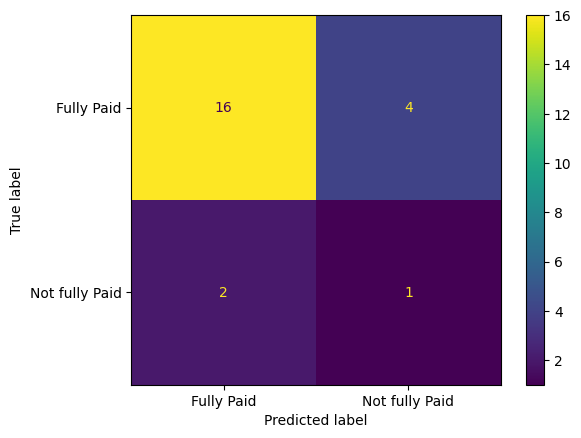

In [41]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

In [45]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None],
}

In [50]:
cv = GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')
cv

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [51]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [52]:
cv.best_params_

{'priors': None, 'var_smoothing': 1e-07}

In [53]:
y_pred = cv.predict(X_test)

In [54]:
acc = accuracy_score(y_test,y_pred)
acc*100

78.26086956521739

In [55]:
f1 = f1_score(y_test,y_pred)
f1*100

28.57142857142857